   # CS 584 - Machine Learning project ( Chicago Weather Prediction )

 # Contributors:
 
 ### Abhishek Konthala ( A20514117)
 ### Arshiya Duggal ( A20544794)
 ### Shallum Israel Maryapanor (A20547274) 

# 1. Installing the dependencies

In [93]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# 2. Data Preprocessing:


In [95]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('data.csv')

# Checking for null values
print(df.isnull().sum())

YEAR         5
MO           0
DY           0
HR           0
TEMP         1
PRCP         0
HMDT         1
WND_SPD      0
ATM_PRESS    1
REF          3
dtype: int64


# 3. Cleaning the Dataset:

In [96]:
# Droping rows with null values
df.dropna(inplace=True)

# Cleaning the variable datatypes
df['MO'] = df['MO'].astype(str)
df['DY'] = df['DY'].astype(str)
df['HR'] = df['HR'].astype(str)

# 4. Exploratory Data Analysis (EDA):

               YEAR          TEMP          PRCP          HMDT       WND_SPD  \
count  24098.000000  24098.000000  24098.000000  24098.000000  24098.000000   
mean    2022.089427     11.555959      0.124602     79.211046      5.579724   
std        0.793181      9.485629      0.699930     12.650788      2.681997   
min     2021.000000    -18.220000      0.000000     29.310000      0.100000   
25%     2021.000000      3.590000      0.000000     70.690000      3.600000   
50%     2022.000000     11.985000      0.000000     80.810000      5.290000   
75%     2023.000000     20.117500      0.020000     89.190000      7.170000   
max     2023.000000     30.150000     38.040000    100.000000     17.840000   

          ATM_PRESS            REF  
count  24098.000000   24098.000000  
mean      99.441527  202215.873807  
std        0.684275      78.826486  
min       95.800000  202103.000000  
25%       99.020000  202112.000000  
50%       99.440000  202208.000000  
75%       99.860000  202304.0

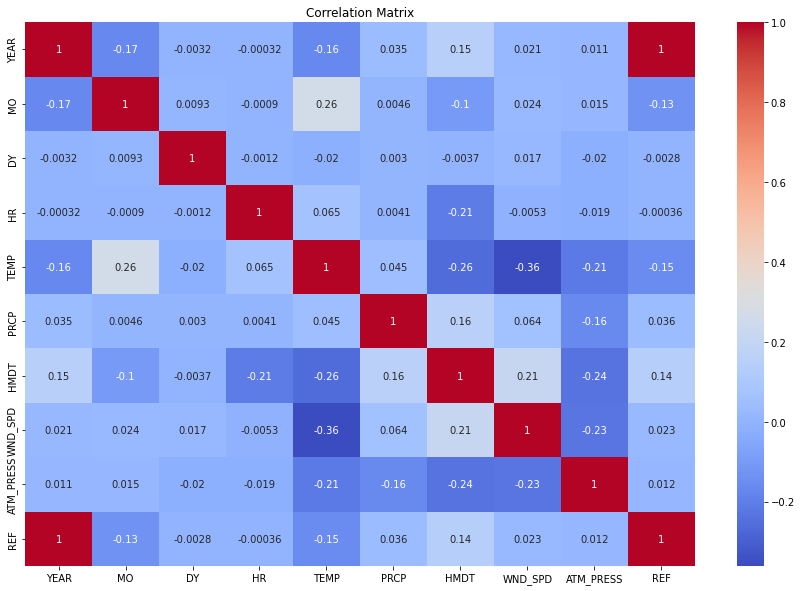

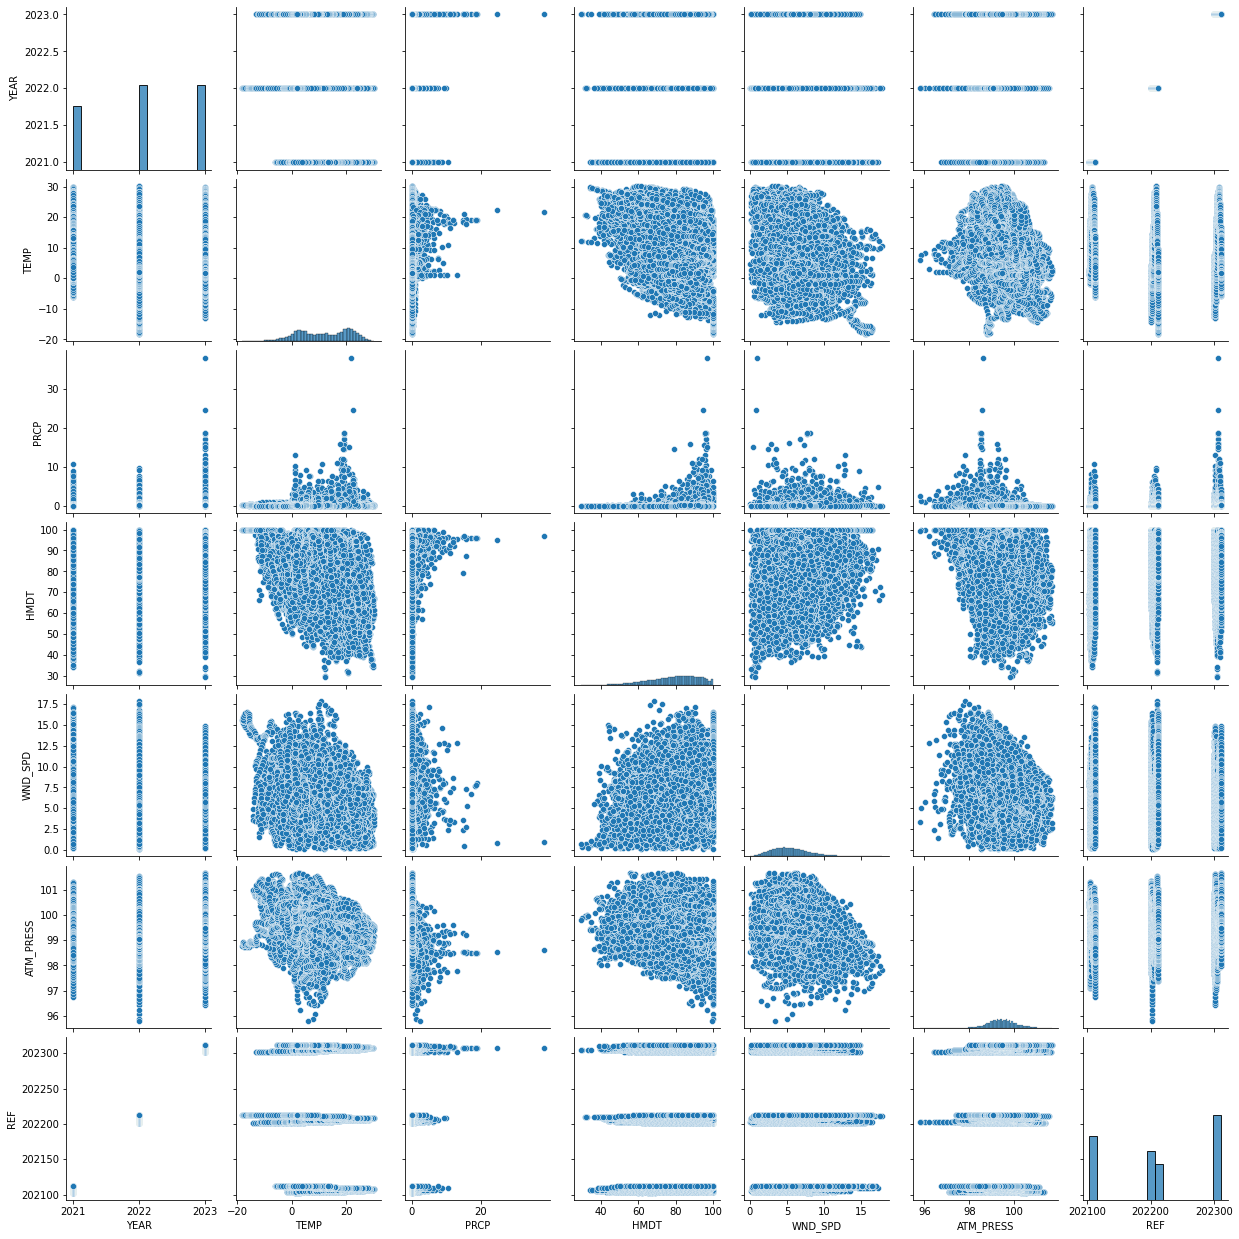

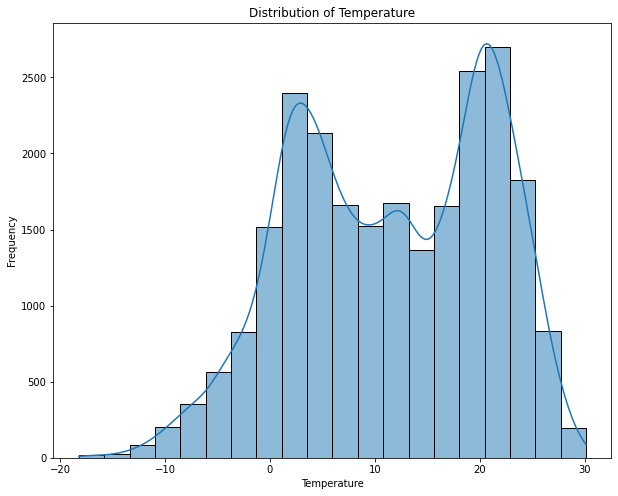

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Describing statistics
print(df.describe())

# Calculating Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Showing Pairplot
sns.pairplot(df)
plt.show()

# Distribution of target variable (e.g., temperature)
plt.figure(figsize=(10, 8))
sns.histplot(df['TEMP'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

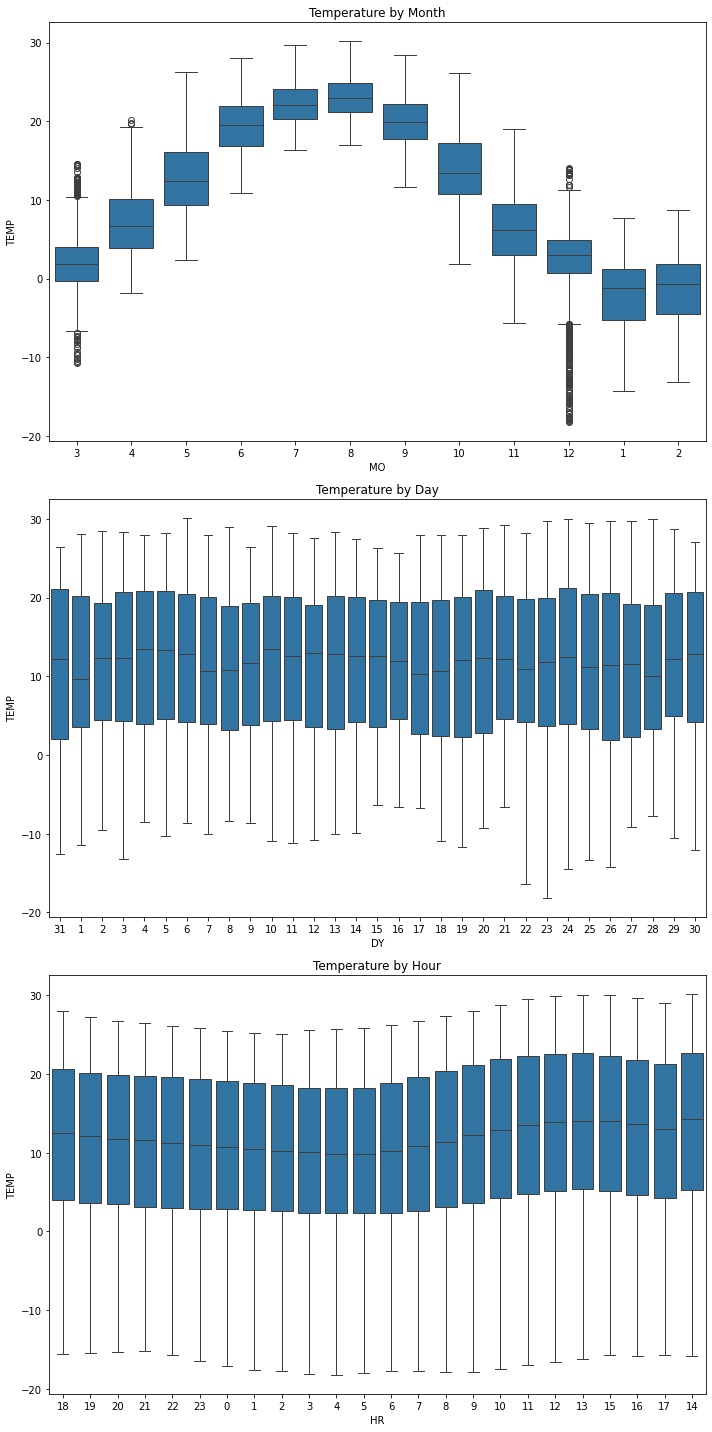

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger figure
plt.figure(figsize=(10, 20))

# Boxplots for categorical variables
plt.subplot(3, 1, 1)
sns.boxplot(x='MO', y='TEMP', data=df)
plt.title('Temperature by Month')

plt.subplot(3, 1, 2)
sns.boxplot(x='DY', y='TEMP', data=df)
plt.title('Temperature by Day')

plt.subplot(3, 1, 3)
sns.boxplot(x='HR', y='TEMP', data=df)
plt.title('Temperature by Hour')

plt.tight_layout()
plt.show()


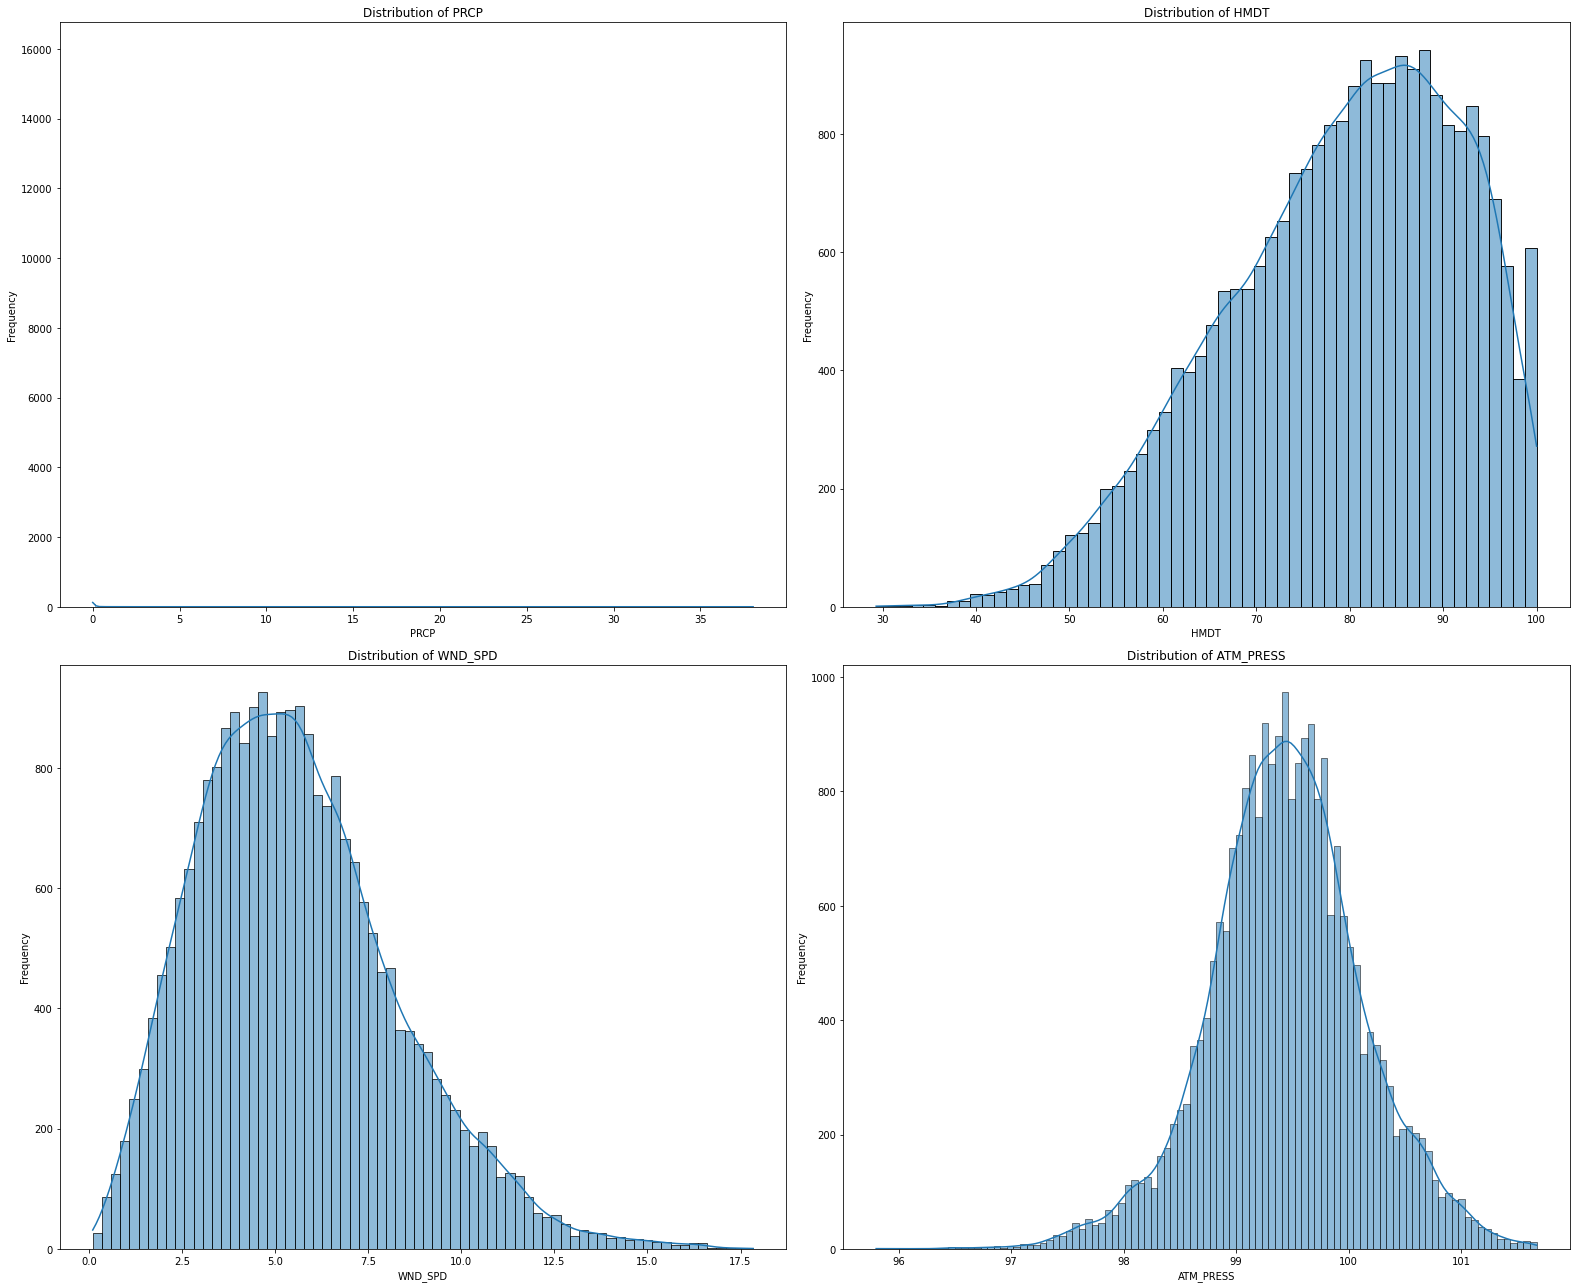

In [99]:
# Distribution of numerical variables
plt.figure(figsize=(22, 18))
for i, column in enumerate(['PRCP', 'HMDT', 'WND_SPD', 'ATM_PRESS'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5. Model Implementation:

## Linear regression and Random forest regression model

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dfset into features and target variable
X = df.drop(columns=['TEMP'])
y = df['TEMP']

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()

# Train models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
linear_reg_preds = linear_reg.predict(X_test)
random_forest_preds = random_forest.predict(X_test)

# Evaluation
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, linear_reg_preds))
print("R2 Score:", r2_score(y_test, linear_reg_preds))

print("\nRandom Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, random_forest_preds))
print("R2 Score:", r2_score(y_test, random_forest_preds))

Linear Regression:
Mean Squared Error: 56.11107556896151
R2 Score: 0.3753266032200945

Random Forest:
Mean Squared Error: 0.9978989542593357
R2 Score: 0.9888905902608448


In [101]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Split the dataset into features and target variable
X = df.drop(columns=['TEMP'])
y = df['TEMP']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()

# Train models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
linear_reg_preds = linear_reg.predict(X_test)
random_forest_preds = random_forest.predict(X_test)

# Evaluate Linear Regression model
mse_linear_reg = mean_squared_error(y_test, linear_reg_preds)
r2_linear_reg = r2_score(y_test, linear_reg_preds)

# Print the original Linear Regression results
print("Original Linear Regression Results:")
print("Mean Squared Error:", mse_linear_reg)
print("R2 Score:", r2_linear_reg)

# Now, optimize Linear Regression with Polynomial Features and Ridge Regression
# Create a pipeline with polynomial features and Ridge regression
poly_reg = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), RidgeCV())

# Perform cross-validation
cv_scores = cross_val_score(poly_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the model
poly_reg.fit(X_train, y_train)

# Evaluate the model
mse_poly_reg = -cv_scores.mean()  # Taking the negative mean to convert back to positive
r2_poly_reg = poly_reg.score(X_test, y_test)

print("\nOptimized Linear Regression Results (Polynomial Features + Ridge Regression):")
print("Mean Squared Error:", mse_poly_reg)
print("R2 Score:", r2_poly_reg)

# Original Random Forest results
mse_random_forest = mean_squared_error(y_test, random_forest_preds)
r2_random_forest = r2_score(y_test, random_forest_preds)

print("\nRandom Forest Results:")
print("Mean Squared Error:", mse_random_forest)
print("R2 Score:", r2_random_forest)

Original Linear Regression Results:
Mean Squared Error: 56.11107556896151
R2 Score: 0.3753266032200945

Optimized Linear Regression Results (Polynomial Features + Ridge Regression):
Mean Squared Error: 20.085624135078913
R2 Score: 0.7746089519594364

Random Forest Results:
Mean Squared Error: 0.9961512703838171
R2 Score: 0.9889100468763515


## Model Visualization

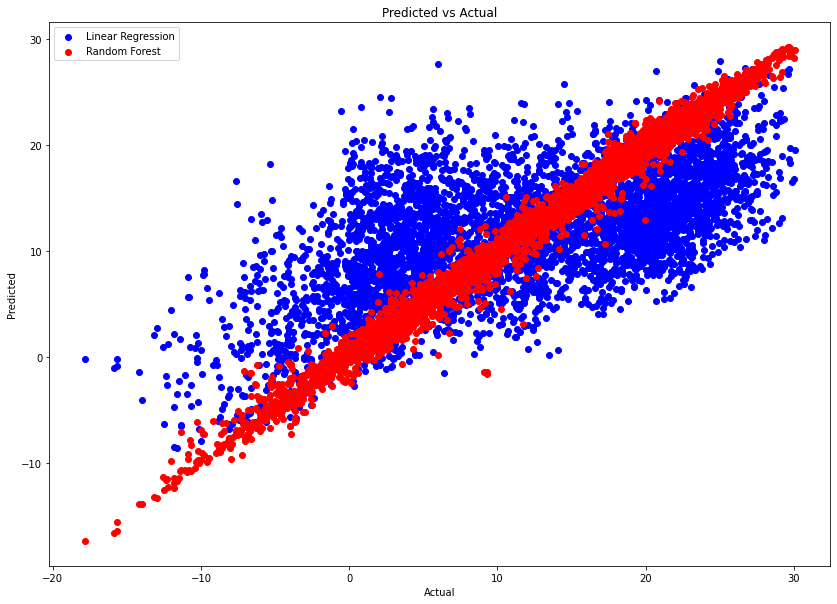

In [102]:
# Visualize predicted vs actual values
plt.figure(figsize=(14, 10))
plt.scatter(y_test, linear_reg_preds, color='blue', label='Linear Regression')
plt.scatter(y_test, random_forest_preds, color='red', label='Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

## Support Vector Machine model

In [103]:
# Import additional models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

# Initialize more models
svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='linear'))
])

# Train more models
svm_reg.fit(X_train, y_train)

# Predictions
svm_reg_preds = svm_reg.predict(X_test)

# Evaluation
print("\nSupport Vector Machine (SVM):")
print("Mean Squared Error:", mean_squared_error(y_test, svm_reg_preds))
print("R2 Score:", r2_score(y_test, svm_reg_preds))


Support Vector Machine (SVM):
Mean Squared Error: 57.356737490845155
R2 Score: 0.3614588978501251


## Model Visualization

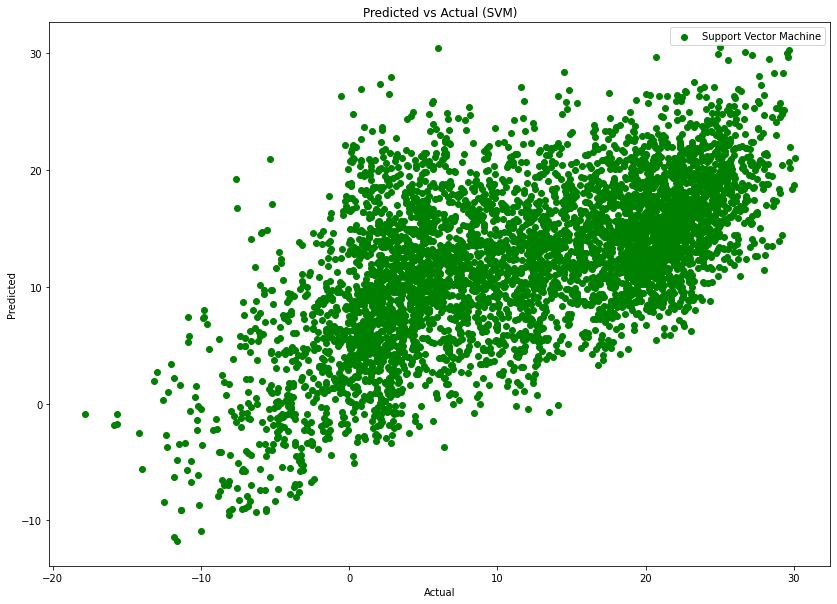

In [104]:
# Visualize predicted vs actual values for SVM
plt.figure(figsize=(14, 10))
plt.scatter(y_test, svm_reg_preds, color='green', label='Support Vector Machine')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual (SVM)')
plt.legend()
plt.show()

## K-neighbhor and Decision Tree model

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize more models
knn_reg = KNeighborsRegressor()
decision_tree_reg = DecisionTreeRegressor()

# Train more models
knn_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)

# Predictions
knn_reg_preds = knn_reg.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)

# Evaluation
print("\nK-Nearest Neighbors (KNN):")
print("Mean Squared Error:", mean_squared_error(y_test, knn_reg_preds))
print("R2 Score:", r2_score(y_test, knn_reg_preds))

print("\nDecision Tree:")
print("Mean Squared Error:", mean_squared_error(y_test, decision_tree_reg_preds))
print("R2 Score:", r2_score(y_test, decision_tree_reg_preds))



K-Nearest Neighbors (KNN):
Mean Squared Error: 8.868519858921161
R2 Score: 0.9012685397934734

Decision Tree:
Mean Squared Error: 2.067371141078838
R2 Score: 0.9769843700195111


## Model Visualization

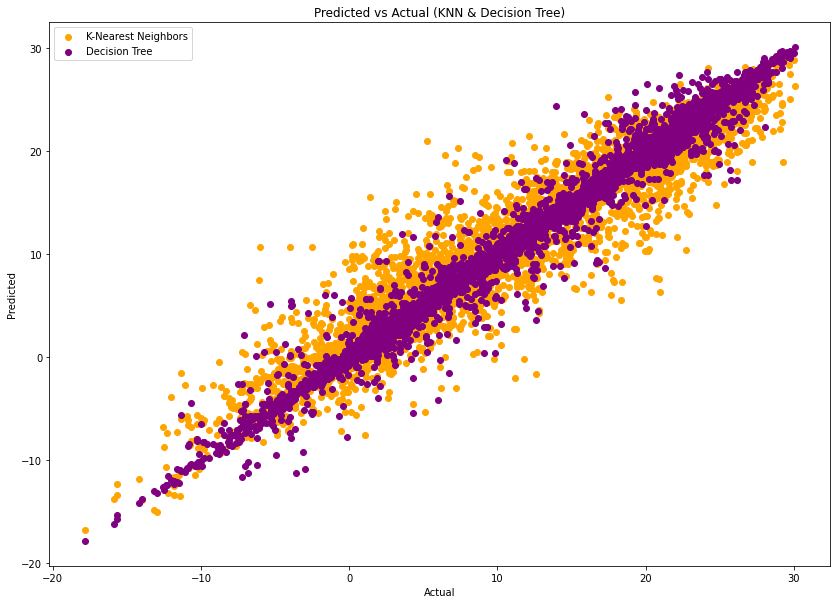

In [106]:
# Visualize predicted vs actual values for KNN and Decision Tree
plt.figure(figsize=(14, 10))
plt.scatter(y_test, knn_reg_preds, color='orange', label='K-Nearest Neighbors')
plt.scatter(y_test, decision_tree_reg_preds, color='purple', label='Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual (KNN & Decision Tree)')
plt.legend()
plt.show()


# 6. Model Comparison and Performances

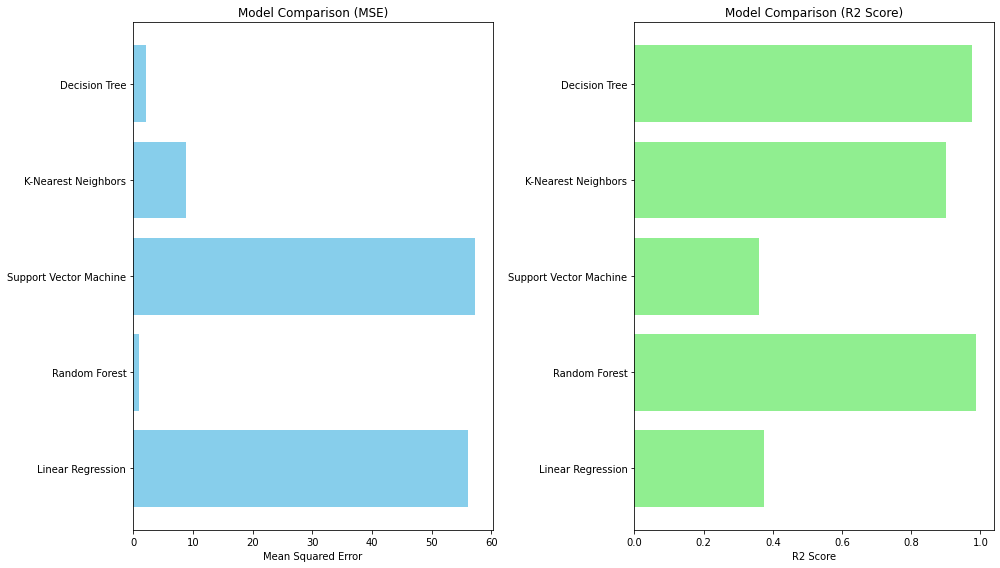

In [107]:
# Compare model performances
models = ['Linear Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree']
mse_scores = [mean_squared_error(y_test, linear_reg_preds), 
              mean_squared_error(y_test, random_forest_preds), 
              mean_squared_error(y_test, svm_reg_preds), 
              mean_squared_error(y_test, knn_reg_preds), 
              mean_squared_error(y_test, decision_tree_reg_preds)]

r2_scores = [r2_score(y_test, linear_reg_preds), 
             r2_score(y_test, random_forest_preds), 
             r2_score(y_test, svm_reg_preds), 
             r2_score(y_test, knn_reg_preds), 
             r2_score(y_test, decision_tree_reg_preds)]

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.barh(models, mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison (MSE)')

plt.subplot(1, 2, 2)
plt.barh(models, r2_scores, color='lightgreen')
plt.xlabel('R2 Score')
plt.title('Model Comparison (R2 Score)')

plt.tight_layout()
plt.show()


## Model Metrics

In [108]:
# Metrics for Linear Regression
mse_linear_reg = mean_squared_error(y_test, linear_reg_preds)
r2_linear_reg = r2_score(y_test, linear_reg_preds)

# Metrics for Random Forest
mse_random_forest = mean_squared_error(y_test, random_forest_preds)
r2_random_forest = r2_score(y_test, random_forest_preds)

# Metrics for Support Vector Machine (SVM)
mse_svm = mean_squared_error(y_test, svm_reg_preds)
r2_svm = r2_score(y_test, svm_reg_preds)

# Metrics for K-Nearest Neighbors (KNN)
mse_knn = mean_squared_error(y_test, knn_reg_preds)
r2_knn = r2_score(y_test, knn_reg_preds)

# Metrics for Decision Tree
mse_decision_tree = mean_squared_error(y_test, decision_tree_reg_preds)
r2_decision_tree = r2_score(y_test, decision_tree_reg_preds)

print("Metrics for Linear Regression:")
print("Mean Squared Error:", mse_linear_reg)
print("R2 Score:", r2_linear_reg)

# Metrics for Optimized Linear Regression
print("\nMetrics for Optimized Linear Regression (Polynomial Features + Ridge Regression):")
print("Mean Squared Error:", mse_poly_reg)
print("R2 Score:", r2_poly_reg)

print("\nMetrics for Random Forest:")
print("Mean Squared Error:", mse_random_forest)
print("R2 Score:", r2_random_forest)

print("\nMetrics for Support Vector Machine (SVM):")
print("Mean Squared Error:", mse_svm)
print("R2 Score:", r2_svm)

print("\nMetrics for K-Nearest Neighbors (KNN):")
print("Mean Squared Error:", mse_knn)
print("R2 Score:", r2_knn)

print("\nMetrics for Decision Tree:")
print("Mean Squared Error:", mse_decision_tree)
print("R2 Score:", r2_decision_tree)


Metrics for Linear Regression:
Mean Squared Error: 56.11107556896151
R2 Score: 0.3753266032200945

Metrics for Optimized Linear Regression (Polynomial Features + Ridge Regression):
Mean Squared Error: 20.085624135078913
R2 Score: 0.7746089519594364

Metrics for Random Forest:
Mean Squared Error: 0.9961512703838171
R2 Score: 0.9889100468763515

Metrics for Support Vector Machine (SVM):
Mean Squared Error: 57.356737490845155
R2 Score: 0.3614588978501251

Metrics for K-Nearest Neighbors (KNN):
Mean Squared Error: 8.868519858921161
R2 Score: 0.9012685397934734

Metrics for Decision Tree:
Mean Squared Error: 2.067371141078838
R2 Score: 0.9769843700195111


## Comparison table:

In [109]:
# Convert R2 score to accuracy-like format
metrics_dict = {
    'Linear Regression': {'MSE': mse_linear_reg, 'R2 Score': r2_linear_reg},
    'Optimized Linear Regression':{'MSE': mse_poly_reg, 'R2 Score': r2_poly_reg},
    'Random Forest': {'MSE': mse_random_forest, 'R2 Score': r2_random_forest},
    'Support Vector Machine': {'MSE': mse_svm, 'R2 Score': r2_svm},
    'K-Nearest Neighbors': {'MSE': mse_knn, 'R2 Score': r2_knn},
    'Decision Tree': {'MSE': mse_decision_tree, 'R2 Score': r2_decision_tree}
}

accuracy_like_r2 = r2_linear_reg * 100

# Print out the formatted accuracy-like R2 score
print("Accuracy (R2 Score): {:.2f}%".format(accuracy_like_r2))

# Print out the comparison
print("Model Comparison:")
print("{:<30} {:<30} {:<20}".format('Model', 'Mean Squared Error', 'Accuracy (R2 Score)'))
for model, metrics in metrics_dict.items():
    accuracy_like_r2 = metrics['R2 Score'] * 100
    print("{:<30} {:<30.4f} {:<20.2f}%".format(model, metrics['MSE'], accuracy_like_r2))

Accuracy (R2 Score): 37.53%
Model Comparison:
Model                          Mean Squared Error             Accuracy (R2 Score) 
Linear Regression              56.1111                        37.53               %
Optimized Linear Regression    20.0856                        77.46               %
Random Forest                  0.9962                         98.89               %
Support Vector Machine         57.3567                        36.15               %
K-Nearest Neighbors            8.8685                         90.13               %
Decision Tree                  2.0674                         97.70               %
